In [7]:
import pandas as pd

df = pd.read_excel('twitter-elon-tesla-data.xlsx')

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34313 entries, 0 to 34312
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   User         34311 non-null  object        
 1   Username     34313 non-null  object        
 2   UTC Date     34313 non-null  datetime64[ns]
 3   post         34313 non-null  object        
 4   Binders      0 non-null      float64       
 5   Permalink    34313 non-null  object        
 6   reposts      34313 non-null  int64         
 7   Likes count  34313 non-null  int64         
 8   Impressions  34313 non-null  int64         
 9   Quotes       34313 non-null  int64         
 10  Replies      34313 non-null  int64         
 11  Bookmarks    34313 non-null  int64         
 12  post value   34313 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 3.4+ MB
None
                   User         Username            UTC Date  \
0     

Remove binders column since it doesn't contain any data.

In [8]:
df = df.drop(columns=['Binders'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34313 entries, 0 to 34312
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   User         34311 non-null  object        
 1   Username     34313 non-null  object        
 2   UTC Date     34313 non-null  datetime64[ns]
 3   post         34313 non-null  object        
 4   Permalink    34313 non-null  object        
 5   reposts      34313 non-null  int64         
 6   Likes count  34313 non-null  int64         
 7   Impressions  34313 non-null  int64         
 8   Quotes       34313 non-null  int64         
 9   Replies      34313 non-null  int64         
 10  Bookmarks    34313 non-null  int64         
 11  post value   34313 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 3.1+ MB
None


User column has two missing values

In [11]:
df['User'].fillna('Unknown')

0                            aHoy
1                        victoria
2                    Frances Caso
3            DavidRowe ⧖ - #WATON
4            The Green Living Guy
                   ...           
34308                PumptheDoge!
34309    ✨れんちゃん✨３＼⁠(⁠^⁠o⁠^⁠)⁠／🗣️🏅
34310    ✨れんちゃん✨３＼⁠(⁠^⁠o⁠^⁠)⁠／🗣️🏅
34311                 Samson Chew
34312                 Samson Chew
Name: User, Length: 34313, dtype: object

In [12]:
df['UTC Date'] = pd.to_datetime(df['UTC Date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34313 entries, 0 to 34312
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   User         34313 non-null  object        
 1   Username     34313 non-null  object        
 2   UTC Date     34313 non-null  datetime64[ns]
 3   post         34313 non-null  object        
 4   Permalink    34313 non-null  object        
 5   reposts      34313 non-null  int64         
 6   Likes count  34313 non-null  int64         
 7   Impressions  34313 non-null  int64         
 8   Quotes       34313 non-null  int64         
 9   Replies      34313 non-null  int64         
 10  Bookmarks    34313 non-null  int64         
 11  post value   34313 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 3.1+ MB
None


In [21]:
import textblob

def calculate_sentiment(text):
    blob = textblob.TextBlob(text)
    sentiment_scores = blob.sentiment.polarity
    return sentiment_scores

df['Sentiment'] = df['post'].apply(calculate_sentiment)

# print(df.head())

In [22]:
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'
    
df['Sentiment'] = df['Sentiment'].apply(classify_sentiment)

# print(df.head())

In [23]:
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
Positive    14563
Neutral     14041
Negative     5709
Name: count, dtype: int64


I would love to see the overall sentiment of tweets about Elon Musk and Tesla, this would give me an idea of whether the public loves or hates them.

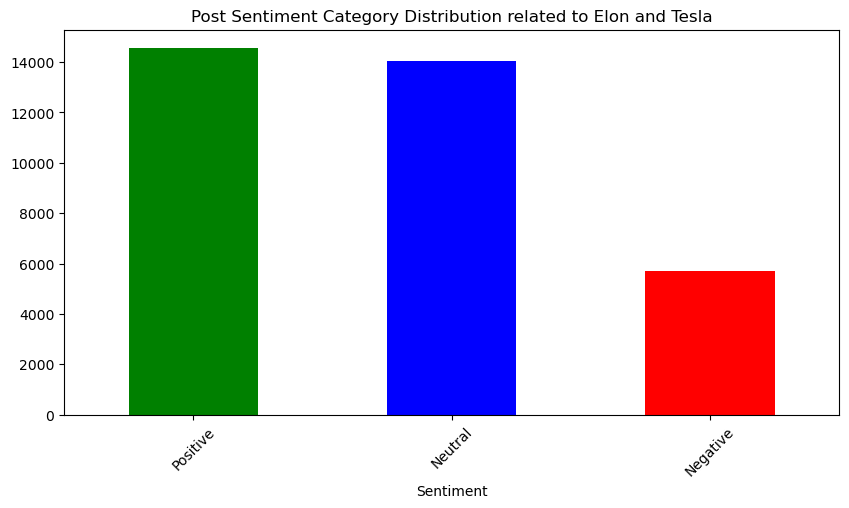

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Post Sentiment Category Distribution related to Elon and Tesla')
plt.xticks(rotation=45)
plt.show()

By creating a word cloud, one can identify trending topics related to Elon and Tesla, words like "Biden" and "China" have quite a few appearances.

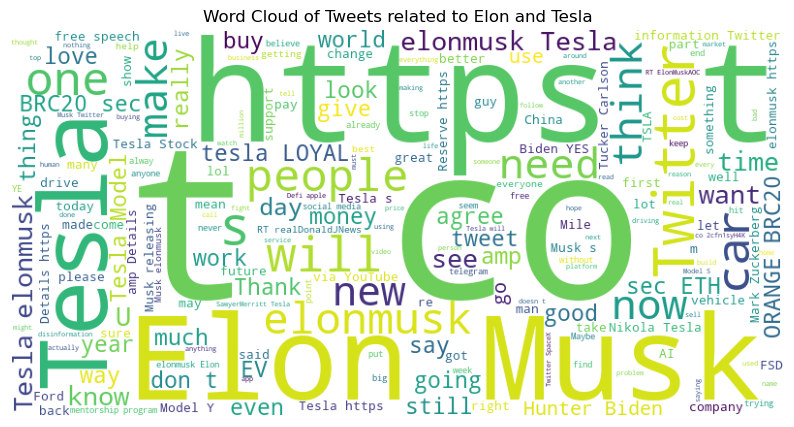

In [49]:
from wordcloud import WordCloud

text = ' '.join(df['post'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Tweets related to Elon and Tesla')
plt.show()

This plot shows how sentiments chanegs over time. If Elon Musk made a controversial tweet we can identify it by looking at the spikes.

<Figure size 100x500 with 0 Axes>

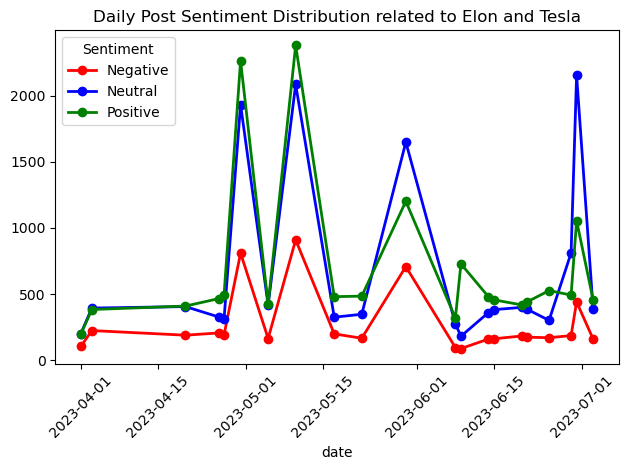

In [76]:
df['date'] = df['UTC Date'].dt.date
daily_sentiment = df.groupby('date')['Sentiment'].value_counts().unstack().fillna(0)

plt.figure(figsize=(1, 5))
daily_sentiment.plot(kind='line', marker='o', linewidth=2, color=['red', 'blue', 'green'])
plt.title('Daily Post Sentiment Distribution related to Elon and Tesla')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This plot simply shows that posts with negative sentiment receives more attention (representing in likes, impression etc.) than positive sentiment.

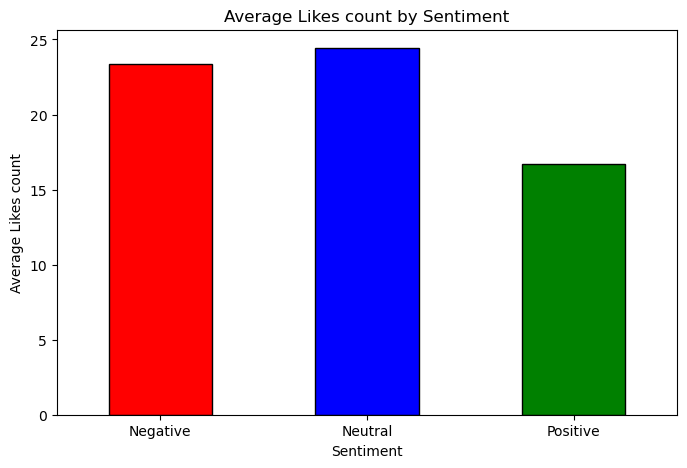

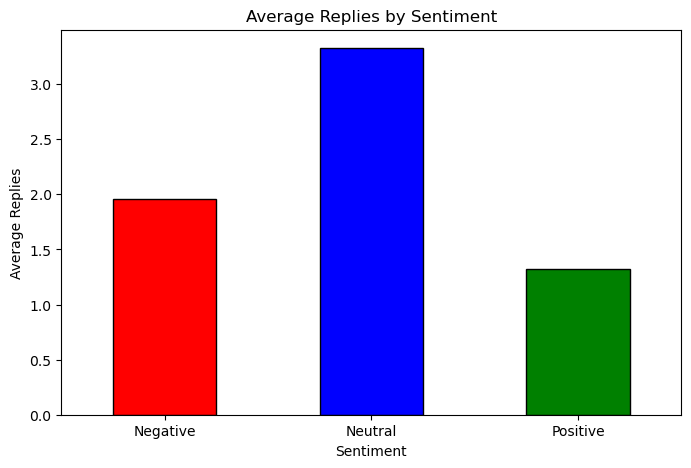

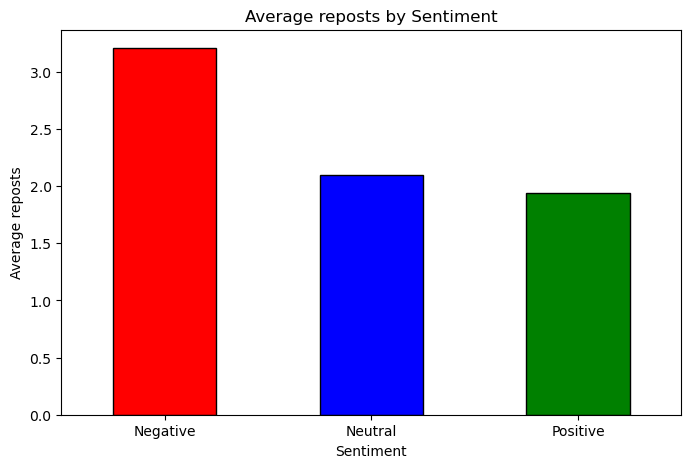

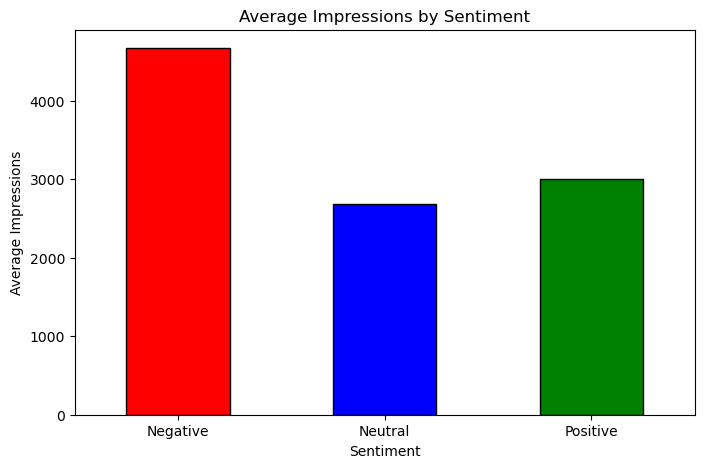

In [66]:
engagement_metrics = ["Likes count", "Replies", "reposts", "Impressions"]

for metric in engagement_metrics:
    plt.figure(figsize=(8, 5))
    df.groupby("Sentiment")[metric].mean().plot(
        kind="bar", color=["red", "blue", "green"], edgecolor="black"
    )
    plt.title(f"Average {metric} by Sentiment")
    plt.xlabel("Sentiment")
    plt.ylabel(f"Average {metric}")
    plt.xticks(rotation=0)
    plt.show()


A heatmap can show correlations between different engagements. For example a strong correlation between impressions and like counts can be simply interpreted as "if we can let more people see it, we get more likes".

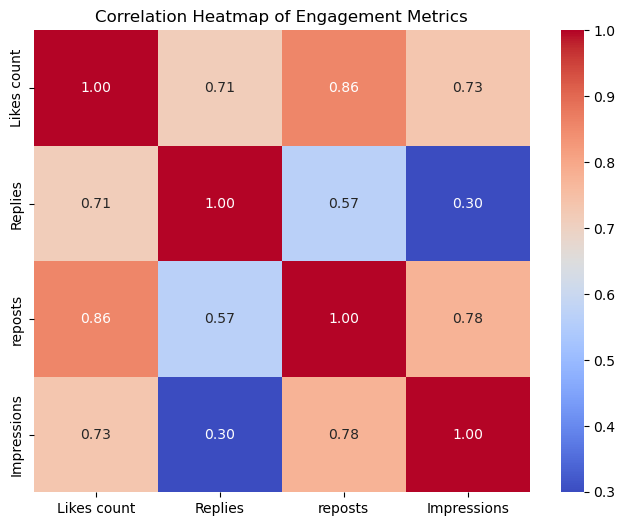

In [69]:
import seaborn as sns

engagement_data = df[["Likes count", "Replies", "reposts", "Impressions"]]
correlation_matrix = engagement_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Engagement Metrics")
plt.show()


This analysis highlights the best days to post content for maximum attention. For the graph we see that Thursday, Friday and Sundays get more likes, replies and impressions so that would be a great time to make anouncement or posting ads.

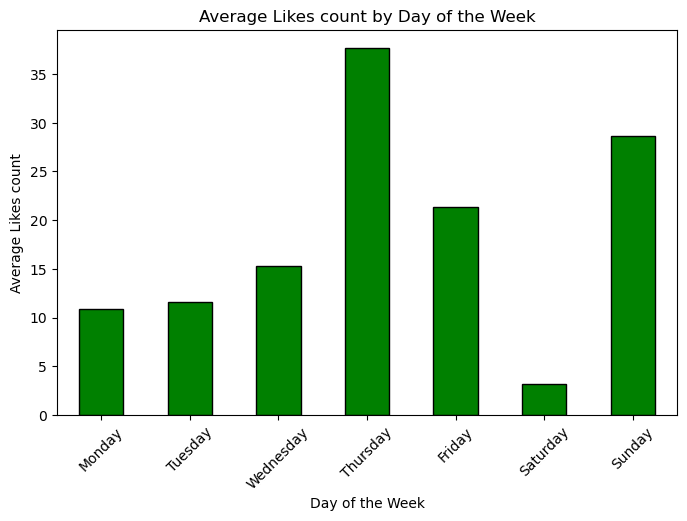

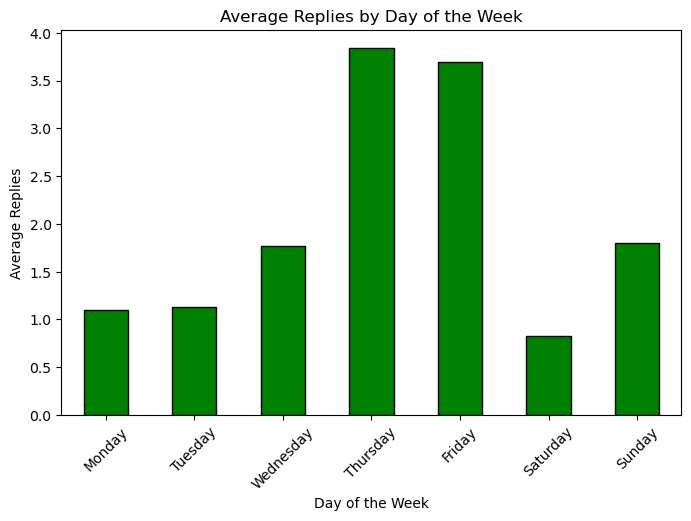

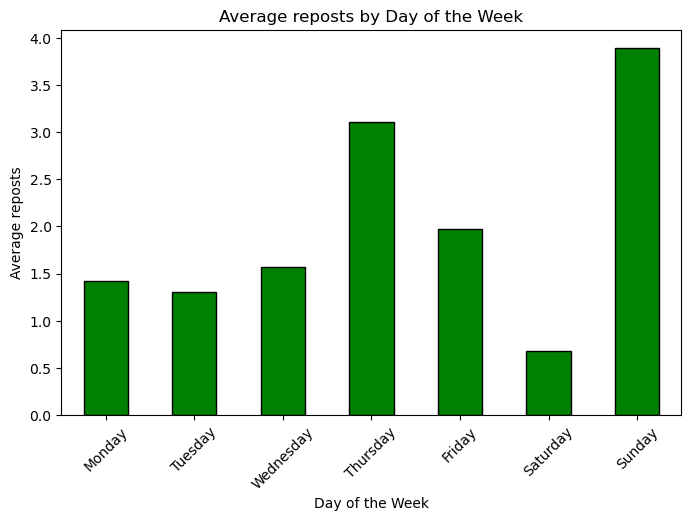

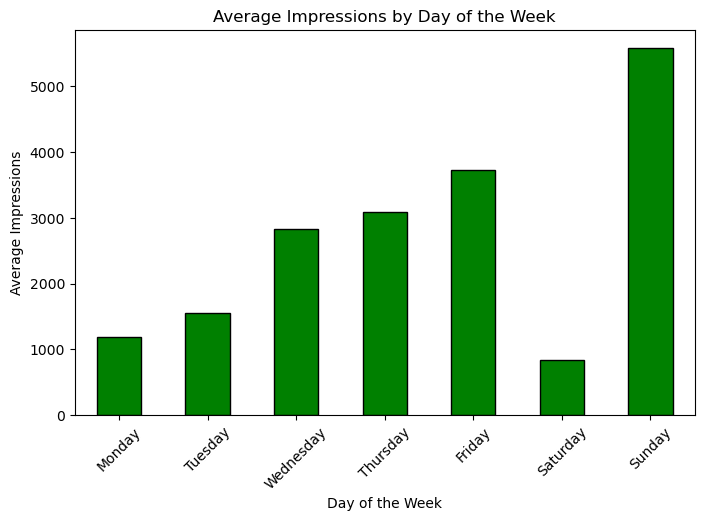

In [72]:
df['day_of_week'] = pd.to_datetime(df['date']).dt.day_name()

engagement_metrics = ["Likes count", "Replies", "reposts", "Impressions"]

for metric in engagement_metrics:
    plt.figure(figsize=(8, 5))
    df.groupby("day_of_week")[metric].mean().reindex(
        ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    ).plot(kind="bar", color="green", edgecolor="black")
    plt.title(f"Average {metric} by Day of the Week")
    plt.xlabel("Day of the Week")
    plt.ylabel(f"Average {metric}")
    plt.xticks(rotation=45)
    plt.show()
